In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
Data,y = mnist['data'], mnist['target']
Data_train, Data_test, y_train, y_test = Data[:60000], Data[60000:], y[:60000], y[60000:]

In [29]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
# print(y_train_5.unique())
y_train = y_train.astype(int)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(Data_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
cross_val_score(sgd_clf, Data_train, y_train_5, cv=4, scoring='accuracy')

array([0.95766667, 0.9664    , 0.96513333, 0.95366667])

In [11]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf,Data_train,y_train_5,cv=3)
print(y_train_pred)
confusion_matrix(y_train_5, y_train_pred)

[ True False False ...  True False False]


array([[53892,   687],
       [ 1891,  3530]])

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) 
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


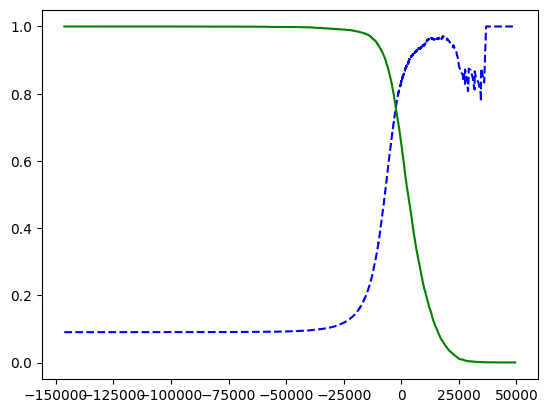

In [16]:
y_scores = cross_val_predict(sgd_clf, Data_train, y_train_5, cv=3, method='decision_function')
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt

pricision,recalls,thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

plot_precision_recall_vs_threshold(pricision,recalls,thresholds)
plt.show()

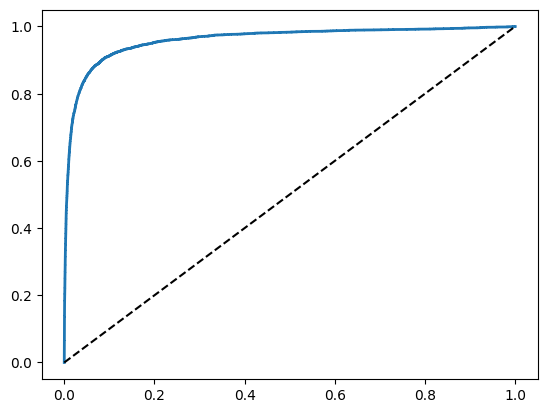

In [25]:
from sklearn.metrics import roc_curve

fpr,tpr,theresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
# plt.show()

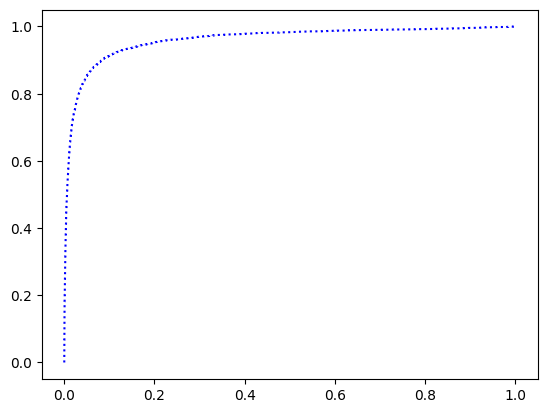

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, Data_train, y_train_5, cv=3, method='predict_proba')

y_score_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_score_forest)
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
# plt.show()

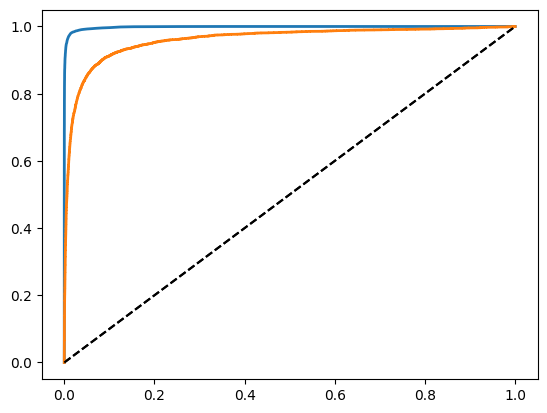

In [26]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plot_roc_curve(fpr,tpr)
plt.show()

In [30]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(Data_train, y_train)

SVC()

In [33]:
svc_clf.predict([Data.loc[0]])
some_digit_scores = svc_clf.decision_function([Data.loc[0]])
print(some_digit_scores)

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]


/home/nomura/tf/env_tf/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/nomura/tf/env_tf/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [35]:
print(type(Data.loc[0]))
print(Data_train.loc[0])

<class 'pandas.core.series.Series'>
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64
